In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
# Constantes do problema
R = 1
L = 10
C = 2
I0 = 0
q0 = 10

# Constantes da solução
N = 101 # número de pontos
dt = 1
t = np.linspace(0, dt*(N-1), N)

# EDOs
def dq(t, q, I):
    return I
def dI(t, q, I):
    return -(R/L)*I -q/(L*C)

In [27]:
# Método de Euler
q1 = np.zeros(N)
I1 = np.zeros(N)
q1[0],I1[0] = q0,I0

for i in range(1, N):
    q1[i] = q1[i-1] + dt * dq(t[i-1], q1[i-1], I1[i-1])
    I1[i] = I1[i-1] + dt * dI(t[i-1], q1[i-1], I1[i-1])

In [28]:
# Método de Euler Modificado
q2 = np.zeros(N)
I2 = np.zeros(N)
q2[0],I2[0] = q0,I0

for i in range(1, N):
    k1 = dt * dq(t[i-1], q2[i-1], I2[i-1])
    l1 = dt * dI(t[i-1], q2[i-1], I2[i-1])
    
    k2 = dt * dq(t[i], q2[i-1] + k1, I2[i-1] + l1)
    l2 = dt * dI(t[i], q2[i-1] + k1, I2[i-1] + l1)
    
    q2[i] = q2[i-1] + (k1 + k2) / 2
    I2[i] = I2[i-1] + (l1 + l2) / 2

In [29]:
# Método do Ponto Médio
q3 = np.zeros(N)
I3 = np.zeros(N)
q3[0],I3[0] = q0,I0

for i in range(1, N):
    k1 = dt * dq(t[i-1], q3[i-1], I3[i-1])
    l1 = dt * dI(t[i-1], q3[i-1], I3[i-1])
    
    k2 = dt * dq(t[i-1] + dt/2, q3[i-1] + k1/2, I3[i-1] + l1/2)
    l2 = dt * dI(t[i-1] + dt/2, q3[i-1] + k1/2, I3[i-1] + l1/2)
    
    q3[i] = q3[i-1] + k2
    I3[i] = I3[i-1] + l2

In [30]:
# Método de Runge-Kutta de 4a ordem
q4 = np.zeros(N)
I4 = np.zeros(N)
q4[0],I4[0] = q0,I0

for i in range(1, N):
    k1 = dt * dq(t[i-1], q4[i-1], I4[i-1])
    l1 = dt * dI(t[i-1], q4[i-1], I4[i-1])
    
    k2 = dt * dq(t[i-1] + dt/2, q4[i-1] + k1/2, I4[i-1] + l1/2)
    l2 = dt * dI(t[i-1] + dt/2, q4[i-1] + k1/2, I4[i-1] + l1/2)
    
    k3 = dt * dq(t[i-1] + dt/2, q4[i-1] + k2/2, I4[i-1] + l2/2)
    l3 = dt * dI(t[i-1] + dt/2, q4[i-1] + k2/2, I4[i-1] + l2/2)
    
    k4 = dt * dq(t[i], q4[i-1] + k3, I4[i-1] + l3)
    l4 = dt * dI(t[i], q4[i-1] + k3, I4[i-1] + l3)
    
    q4[i] = q4[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    I4[i] = I4[i-1] + (l1 + 2*l2 + 2*l3 + l4) / 6

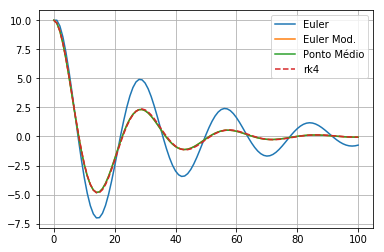

In [31]:
plt.plot(t, q1)
plt.plot(t, q2)
plt.plot(t, q3)
plt.plot(t, q4, '--')
plt.grid(True)
plt.legend(['Euler', 'Euler Mod.', 'Ponto Médio', 'rk4'])